# Main Model - Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns


In [ ]:
#test_dataset = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

df.shape

(614, 13)

In [ ]:
#df.info

In [ ]:
#Dropping all of the NAN values
df = df.dropna()


In [ ]:
df.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df = df.drop(['Loan_ID'], axis=1)


Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


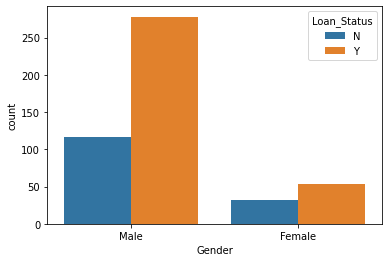

In [ ]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])
print(pd.crosstab(df['Gender'],df['Loan_Status']))

In [ ]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Married'] = df['Married'].map({'No':0, 'Yes':1})
df['Dependents'] = df['Dependents'].map({'3+':3, '0':0, '1':1, '2':2}) #changing the 3+ dependants to 3
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Rural':0, 'Semiurban':1,'Urban':2})
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1})
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0


In [ ]:
df = df.drop(['ApplicantIncome'], axis=1)
df = df.drop(['CoapplicantIncome'], axis=1)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,0,1,1,1,0,128.0,360.0,1.0,0,0,6091.0
2,0,1,0,1,1,66.0,360.0,1.0,2,1,3000.0
3,0,1,0,0,0,120.0,360.0,1.0,2,1,4941.0
4,0,0,0,1,0,141.0,360.0,1.0,2,1,6000.0
5,0,1,2,1,1,267.0,360.0,1.0,2,1,9613.0
6,0,1,0,0,0,95.0,360.0,1.0,2,1,3849.0
7,0,1,3,1,0,158.0,360.0,0.0,1,0,5540.0
8,0,1,2,1,0,168.0,360.0,1.0,2,1,5532.0
9,0,1,1,1,0,349.0,360.0,1.0,1,0,23809.0
10,0,1,2,1,0,70.0,360.0,1.0,2,1,3900.0


In [ ]:
#rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Gender,1.000000,-0.349424,-0.217510,0.059245,0.002761,-0.098975,0.088704,-0.022447,0.000204,-0.064504,-0.099472
Married,-0.349424,1.000000,0.386367,-0.001652,0.015674,0.183442,-0.107504,0.029095,0.038653,0.112321,0.080003
Dependents,-0.217510,0.386367,1.000000,-0.028608,0.045754,0.172780,-0.096361,-0.026651,0.001191,0.035428,0.124373
Education,0.059245,-0.001652,-0.028608,1.000000,0.005085,0.172780,0.102168,0.056656,0.055005,0.068437,0.157209
Self_Employed,0.002761,0.015674,0.045754,0.005085,1.000000,0.120389,-0.034852,-0.023568,-0.050797,-0.034715,0.161492
LoanAmount,-0.098975,0.183442,0.172780,0.172780,0.120389,1.000000,0.050867,-0.040773,-0.109685,-0.071753,0.553914
Loan_Amount_Term,0.088704,-0.107504,-0.096361,0.102168,-0.034852,0.050867,1.000000,0.032937,-0.058656,-0.007798,-0.012822
Credit_History,-0.022447,0.029095,-0.026651,0.056656,-0.023568,-0.040773,0.032937,1.000000,-0.003013,0.529390,-0.057126
Property_Area,0.000204,0.038653,0.001191,0.055005,-0.050797,-0.109685,-0.058656,-0.003013,1.000000,0.031361,-0.047606
Loan_Status,-0.064504,0.112321,0.035428,0.068437,-0.034715,-0.071753,-0.007798,0.529390,0.031361,1.000000,-0.062465


# Test Code


In [ ]:
#Dropping any outliers
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.777083,0.797917,0.137500,144.735417,342.050000,0.854167,1.022917,0.691667,6945.324833
std,0.383892,0.478118,1.020815,0.401973,0.344734,80.508164,65.212401,0.353307,0.776411,0.462287,5969.948374
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,4148.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,128.000000,360.000000,1.000000,1.000000,1.000000,5422.500000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,170.000000,360.000000,1.000000,2.000000,1.000000,7672.500000
max,1.000000,1.000000,3.000000,1.000000,1.000000,600.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


In [ ]:
#Checking for Imbalances
test1 = df.groupby(['Loan_Status'], sort=True).size()
test1

Loan_Status
0    148
1    332
dtype: int64

In [ ]:
#Feature selection, Train with 6 best features
train_dataset = df.drop(columns=['Gender','Self_Employed','LoanAmount','Loan_Amount_Term'], axis=1) 
train_dataset.head()

,Married,Dependents,Education,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,1,1,1.0,0,0,6091.0
2,1,0,1,1.0,2,1,3000.0
3,1,0,0,1.0,2,1,4941.0
4,0,0,1,1.0,2,1,6000.0
5,1,2,1,1.0,2,1,9613.0


In [ ]:
X = train_dataset.drop('Loan_Status', axis=1)
y = train_dataset['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44) #random state 44 somehow gives the highest score.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=44) # 0.25 x 0.8 = 0.2
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(288, 6)
(96, 6)
(288,)
(96,)
(96, 6)
(96,)


In [ ]:
#Normalization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Train the dataset using different classifications or regressions

linear_model = LinearRegression()
model1 = linear_model.fit(X_train_scaled, y_train)
linear_model.score(X_train_scaled, y_train)

0.26081069275375746

In [ ]:
lbfgs_clf = LogisticRegression(solver='lbfgs')
model2 = lbfgs_clf.fit(X_train_scaled, y_train)
print(lbfgs_clf.score(X_test_scaled, y_test))

0.875


In [ ]:
rbfSVM_clf = SVC(kernel='rbf')
model3 = rbfSVM_clf.fit(X_train_scaled, y_train)
print(rbfSVM_clf.score(X_test_scaled, y_test))

0.875


In [ ]:
polySVM_clf = SVC(kernel='poly')
model4 = polySVM_clf.fit(X_train_scaled, y_train)
print(polySVM_clf.score(X_test_scaled, y_test))

0.8958333333333334


In [ ]:
# Evaluating the learning curve
train_size, train_scores, valid_scores = learning_curve(
    SVC(kernel='poly'), X_train_scaled, y_train, cv=4)

plt.plot(train_size,np.mean(train_scores,axis=1))
plt.plot(train_size,np.mean(valid_scores,axis=1))

In [ ]:
saga_clf = LogisticRegression(solver='saga')
model5 = saga_clf.fit(X_train_scaled, y_train)
print(saga_clf.score(X_test_scaled, y_test))

0.875


In [ ]:
liblinear_clf = LogisticRegression(solver='liblinear')
model6 = liblinear_clf.fit(X_train_scaled, y_train)
print(liblinear_clf.score(X_test_scaled, y_test))

0.8854166666666666


# Histogram of 5 inputs


Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


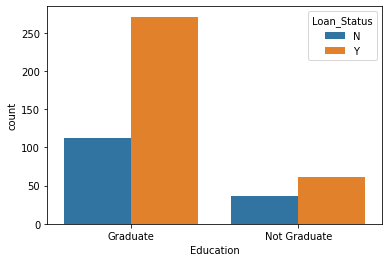

In [ ]:
#Histogram part
#Education vs. loan status
sns.countplot(df['Education'],hue=df['Loan_Status'])
print(pd.crosstab(df['Education'],df['Loan_Status']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325


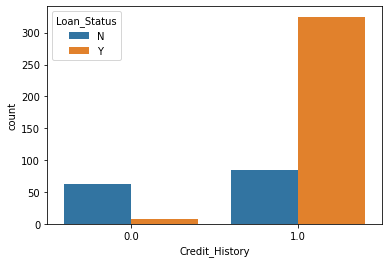

In [ ]:
#Credit history vs loan status
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


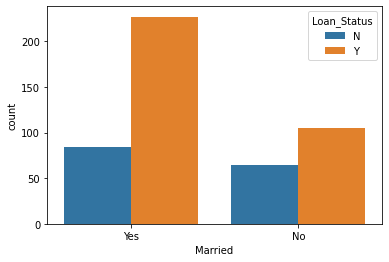

In [ ]:
#Married vs loan status
sns.countplot(df['Married'],hue=df['Loan_Status'])
print(pd.crosstab(df['Married'],df['Loan_Status']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98


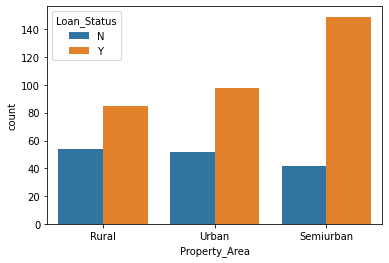

In [ ]:
#Property Area vs loan status
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


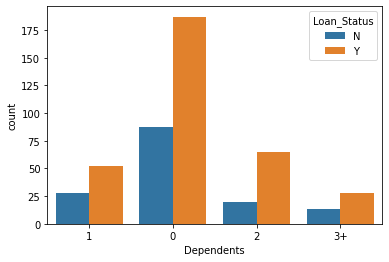

In [ ]:
#Dependents vs loan status
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
print(pd.crosstab(df['Dependents'],df['Loan_Status']))